TASK 1 - IRIS FLOWER CLASSIFICATION

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#loading_the_dataset
from google.colab import files
dataset=files.upload()


Saving Iris.csv to Iris (1).csv


In [ ]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#deleting_id_row
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#displayig_stats_about_data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#displying_basic_info_about_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#displaying_no_of_samples_of_each_class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64



Pre Processing the datset

In [ ]:
#check_for_null_values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis-Visualising Data inform of graphs

<Axes: >

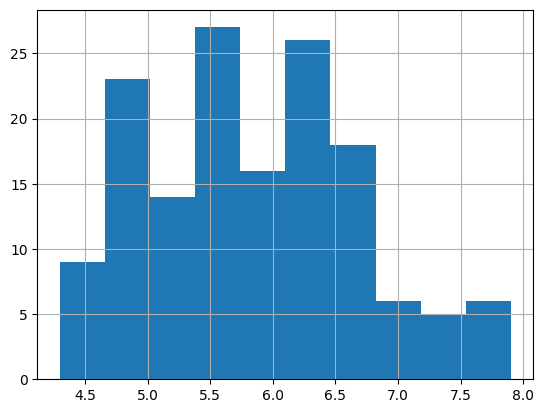

In [ ]:
#histogram
df['SepalLengthCm'].hist()

<Axes: >

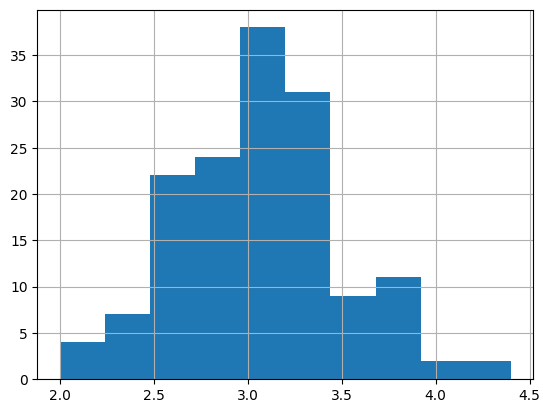

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

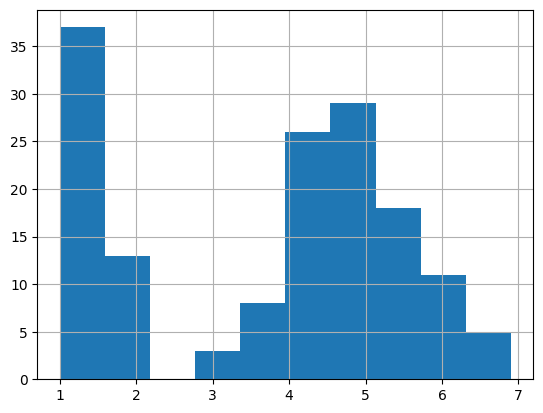

In [ ]:
df['PetalLengthCm'].hist()

<Axes: >

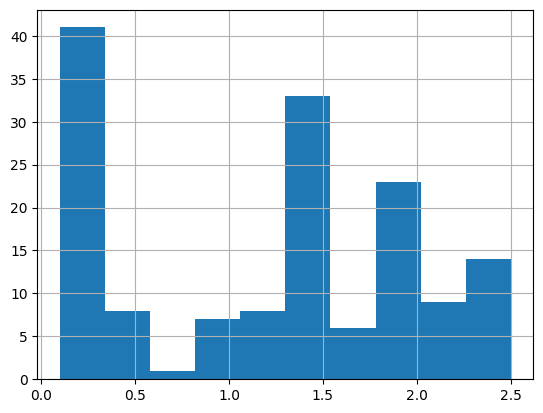

In [ ]:
df['PetalWidthCm'].hist()

In [ ]:
#scatter_plot
colors=['orange','blue','green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

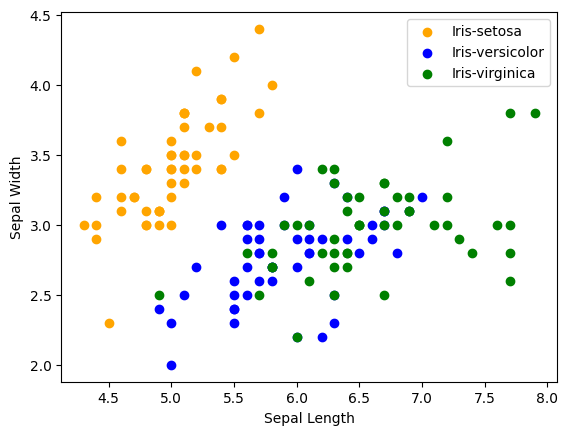

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i], label=species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.legend()

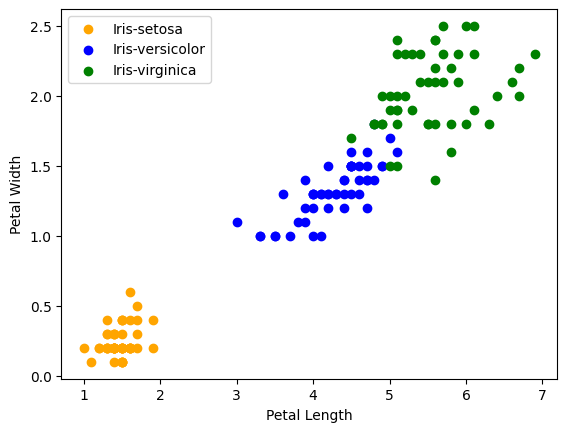

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
  plt.xlabel("Petal Length")
  plt.ylabel("Petal Width")
  plt.legend()

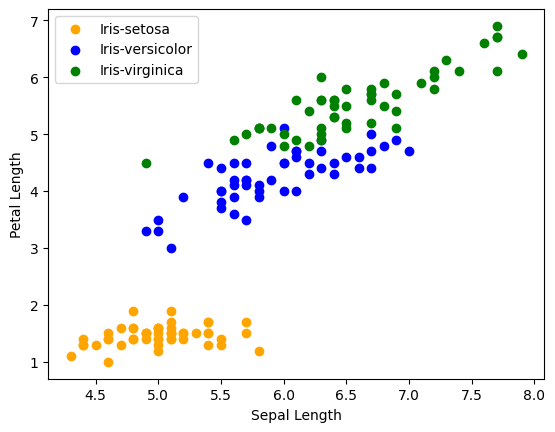

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c=colors[i], label=species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Petal Length")
  plt.legend()

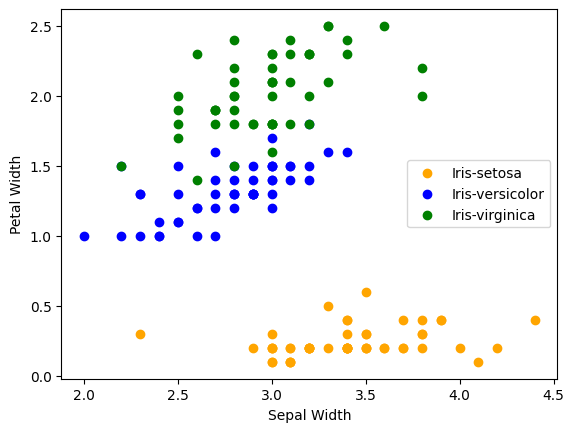

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
  plt.xlabel("Sepal Width")
  plt.ylabel("Petal Width")
  plt.legend()

Correlation Matrix

In [ ]:
df.corr()

<ipython-input-36-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-40-9cbfbe3c8f27>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

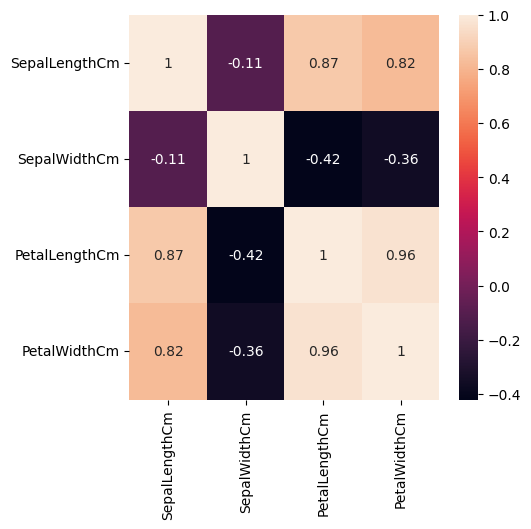

In [ ]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#spliting_train_and_test_data
X=df.drop(columns=['Species'])
Y=df['Species']
x_train, x_test, y_train, y_test  = train_test_split(X,Y,test_size=0.30)

In [ ]:
#logistic_regression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [ ]:
#model_training
model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Accuracy: ",model1.score(x_test,y_test)*100)

Accuracy:  91.11111111111111


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777
